#Wine Quality Prediction

**Overview**

The goal of this project is to predict wine quality scores (3–9) for wines based on its physicochemical properties.The dataset contains 6,497 wine samples with 11 physicochemical features and one target variable (quality). The data was split into training and test sets, with 1,293 samples used for testing.A Random Forest classifier was used to model the relationship between physicochemical properties and wine quality. In this project, we treat wine quality prediction as a multi-class classification problem, where each wine is assigned a discrete quality score. The model is evaluated on its ability to correctly classify wines into these quality scores.

**Data Set Information**

The dataset was downloaded from the UCI Machine Learning Repository.Kaggle source: https://www.kaggle.com/datasets/rajyellow46/wine-quality/data

**Data Description**

Attribute Information:

 - fixed acidity: 4.0-16.0
 - volatile acidity: 0.1-1.6
 - citric acid:0.0-1.0
 - residual sugar:0.5-16.0
 - chlorides: 0.01-0.65
 - free sulfur dioxide: 1-300
 - total sulfur dioxide: 6-450
 - density:0.987-1.040
 - pH: 1-14
 - sulphates: 0.2-2.0
 - alcohol: 8.0- 15.0
 - quality (score between 0 and 10)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading the data from a csv file:

In [ ]:
uploaded = files.upload()
df = pd.read_csv("winequalityN.csv", sep=',')


Saving winequalityN.csv to winequalityN.csv


In [ ]:
#print the first five rows
print(df.head())
print(df.describe())


    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

The dataset was split into training and testing sets to evaluate the model’s performance on unseen data.

In [ ]:

data = pd.read_csv('winequalityN.csv')
if 'type' in data.columns:
    data['type'] = data['type'].map({'red': 0, 'white': 1})

#Handle missing values
data = data.dropna()

#Separate features and target
X = data.drop('quality', axis=1)
y = data['quality']

#Split data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)




The trained model was evaluated using accuracy, a confusion matrix, and a classification report.
Accuracy measures the overall correctness of predictions, while the confusion matrix and classification report provide detailed insights into class-wise performance.


In [ ]:
#Define and fit model
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

labels = sorted(y_test.unique())
cm_df = pd.DataFrame(cm, index=[f'Actual {i}' for i in labels], columns=[f'Predicted {i}' for i in labels])

In [ ]:
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(cm_df.T)
print("\nClassification Report:")
print(report)


Accuracy: 0.6952822892498066

Confusion Matrix:
             Actual 3  Actual 4  Actual 5  Actual 6  Actual 7  Actual 8  \
Predicted 3         0         0         0         0         0         0   
Predicted 4         0         7         0         0         0         0   
Predicted 5         2        29       308        76         6         0   
Predicted 6         2        10       113       452        93        15   
Predicted 7         0         1         4        27       119        14   
Predicted 8         0         0         0         0         1        13   
Predicted 9         0         0         0         0         0         0   

             Actual 9  
Predicted 3         0  
Predicted 4         0  
Predicted 5         0  
Predicted 6         0  
Predicted 7         1  
Predicted 8         0  
Predicted 9         0  

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00   

The model achieved an accuracy of approximately 70%.
It performed well in predicting the most frequent wine quality scores (5 and 6), but struggled with rare classes such as 3, 4, 8, and 9 due to class imbalance in the dataset.


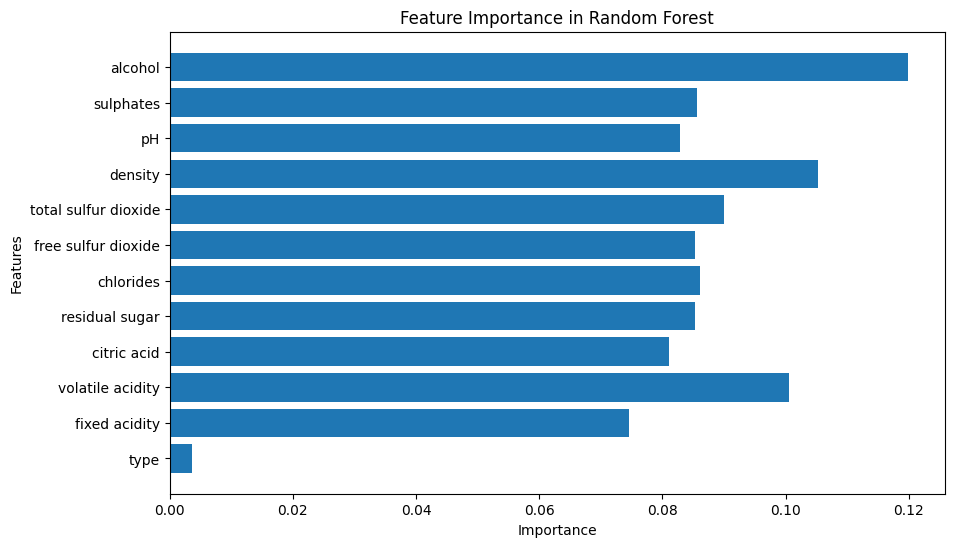

In [ ]:
#Feature importance plot
feature_importances = model.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

The feature importance plot shows that alcohol, density, and volatile acidity are the most influential factors in predicting wine quality. This indicates that taste-related chemical properties play a major role in the model’s decisions, while features such as residual sugar and pH have relatively lower impact.


**Analysis**

- The model was trained as a multiclass classifier to predict discrete wine quality scores ranging from 3 to 9.

- Overall accuracy of approximately 70% indicates reasonable predictive performance on unseen data.

- The confusion matrix shows that the model primarily predicts middle quality scores (5 and 6).

- Rare quality classes (3, 4, 8, and 9) exhibit very low recall, with some classes not being predicted at all.

- Feature importance analysis indicates that alcohol, density, and volatile acidity are the most influential features in predicting wine quality.

**Key Takeaways**

- The model is effective for predicting common wine quality levels, particularly scores of 5 and 6.

- Class imbalance is the primary limitation, causing poor performance on extreme quality scores.

- Feature importance adds interpretability and validates the model’s decision-making process.